In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import rand_score
import networkx as nx


from preprocess import load_ts_dataset, distance_matrix, epsilon_graph_hard, epsilon_graph_mean
from nmf import nmf, nmf_sklearn, semi_nmf, sym_nmf, rgnmf_multi, kernel_nmf, sparse_nmf
from clustering_algos import kmeans, gaussian_mixture, spectral_clustering
from visualizing import plot_residuals

c:\Users\jbhim\miniconda3\envs\timeseries\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
# list of datasets
# ['Adiac', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'Car', 'CBF', 'ChlorineConcentration', 'CinCECGTorso', 'Coffee', 'Computers', 'CricketX', 'CricketY', 'CricketZ', 'DiatomSizeReduction', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxTW', 'Earthquakes', 'ECG200', 'ECG5000', 'ECGFiveDays', 'ElectricDevices', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords', 'Fish', 'FordA', 'FordB', 'GunPoint', 'Ham', 'HandOutlines', 'Haptics', 'Herring', 'InlineSkate', 'InsectWingbeatSound', 'ItalyPowerDemand', 'LargeKitchenAppliances', 'Lightning2', 'Lightning7', 'Mallat', 'Meat', 'MedicalImages', 'MiddlePhalanxOutlineCorrect', 'MiddlePhalanxOutlineAgeGroup', 'MiddlePhalanxTW', 'MoteStrain', 'NonInvasiveFatalECGThorax1', 'NonInvasiveFatalECGThorax2', 'OliveOil', 'OSULeaf', 'PhalangesOutlinesCorrect', 'Phoneme', 'Plane', 'ProximalPhalanxOutlineCorrect', 'ProximalPhalanxOutlineAgeGroup', 'ProximalPhalanxTW', 'RefrigerationDevices', 'ScreenType', 'ShapeletSim', 'ShapesAll', 'SmallKitchenAppliances', 'SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'StarLightCurves', 'Strawberry', 'SwedishLeaf', 'Symbols', 'SyntheticControl', 'ToeSegmentation1', 'ToeSegmentation2', 'Trace', 'TwoLeadECG', 'TwoPatterns', 'UWaveGestureLibraryX', 'UWaveGestureLibraryY', 'UWaveGestureLibraryZ', 'UWaveGestureLibraryAll', 'Wafer', 'Wine', 'WordSynonyms', 'Worms', 'WormsTwoClass', 'Yoga', 'ArticularyWordRecognition', 'AtrialFibrillation', 'BasicMotions', 'CharacterTrajectories', 'Cricket', 'DuckDuckGeese', 'EigenWorms', 'Epilepsy', 'EthanolConcentration', 'ERing', 'FaceDetection', 'FingerMovements', 'HandMovementDirection', 'Handwriting', 'Heartbeat', 'InsectWingbeat', 'JapaneseVowels', 'Libras', 'LSST', 'MotorImagery', 'NATOPS', 'PenDigits', 'PEMS-SF', 'Phoneme', 'RacketSports', 'SelfRegulationSCP1', 'SelfRegulationSCP2', 'SpokenArabicDigits', 'StandWalkJump', 'UWaveGestureLibrary']


In [11]:
dataset = load_ts_dataset('ArrowHead')
data, true_labels = dataset[0], dataset[1]
dist = distance_matrix(data)
#A = epsilon_graph_hard(dist, epsilon=1e-4)
A = epsilon_graph_mean(dist)

Iteration 100, residual norm 0.2515556751320497


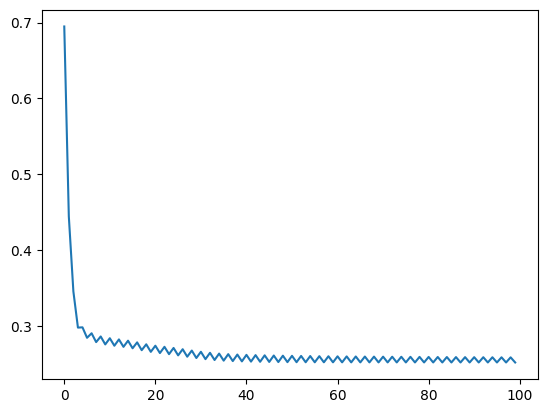

In [5]:
DIMENSION = 10
#W, H, residual = nmf(A, DIMENSION)
W, H, residual = sparse_nmf(A, DIMENSION, beta=0.1, eta=0)
#W, H, residual = semi_nmf(A, DIMENSION)
#W, H, residual = sym_nmf(A, DIMENSION)
#W, H, S, residual = rgnmf_multi(A, DIMENSION)
plot_residuals(residual)



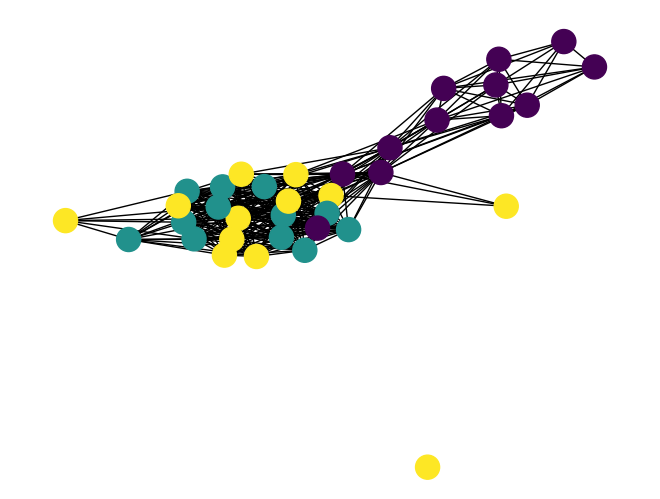

In [12]:
G = nx.from_numpy_array(A)
nx.draw(G, node_color=true_labels)

(36, 2)


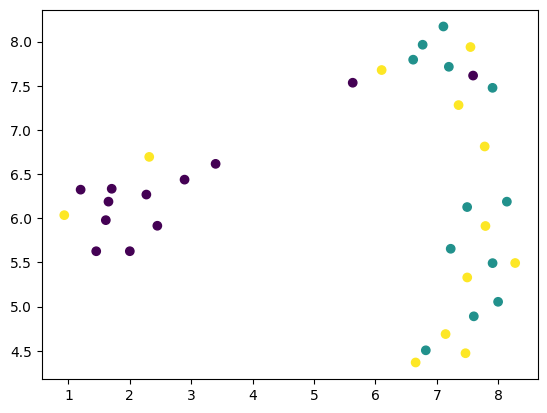

In [8]:

import umap
reducer = umap.UMAP()
reduction = reducer.fit_transform(A)
print(reduction.shape)
plt.scatter(reduction[:, 0], reduction[:, 1], c=true_labels)

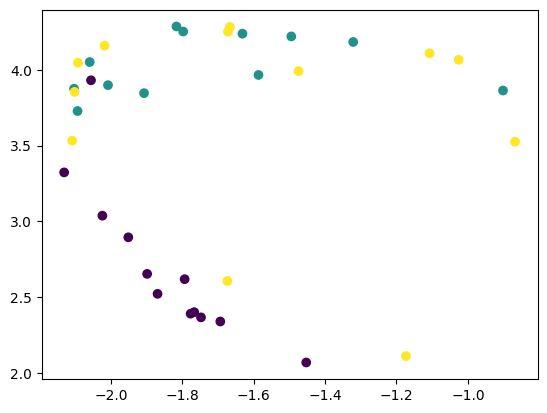

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
reduction = tsne.fit_transform(A)

plt.scatter(reduction[:, 0], reduction[:, 1], c=true_labels)

[0.01939277 0.00520091]


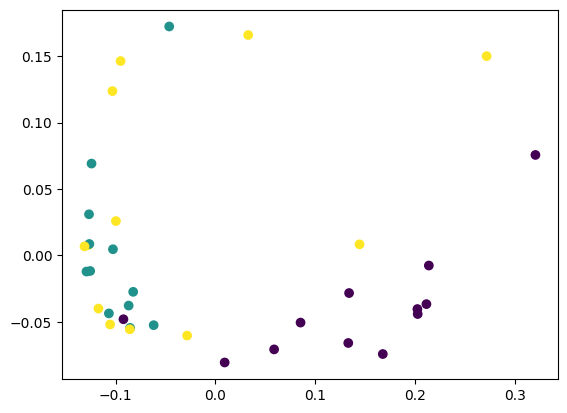

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduction = pca.fit_transform(A)
print(pca.explained_variance_)

plt.scatter(reduction[:, 0], reduction[:, 1], c=true_labels)

# Prediction

In [10]:
predicted_clusters = np.argmax(W, axis=1)
#predicted_clusters = np.argmax(H, axis=0)


In [155]:
rand_score(true_labels, predicted_clusters)

0.6873015873015873

In [169]:
rand_score(true_labels, kmeans(A, DIMENSION))


c:\Users\jbhim\miniconda3\envs\timeseries\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6825396825396826